# Project n°2 : Community Detection in a Blog network

## Authors : Loïc Rosset, Nanaé Aubry

Reference for the data :

The Network Data Repository with Interactive Graph Analytics and Visualization, Ryan A. Rossi and Nesreen K. Ahmed, AAAI, http://networkrepository.com, 2015.

## 0) Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import heapq
import time
import random
import itertools

## 1) Dataset

### Load the data set

In order to load the data set, a small modification had to be done on the original data file. We had to remove the headers of the data and change the file extension to "txt".

In [2]:
fullG = nx.read_edgelist('dataset/soc-BlogCatalog.txt', nodetype=int, data=(int,int))

### Explore the properties of the graph

General information of the graph :

In [3]:
print(nx.info(fullG))

Name: 
Type: Graph
Number of nodes: 88784
Number of edges: 2093195
Average degree:  47.1525


Is the graph connected ?

In [4]:
nx.is_connected(fullG)

True

What is the maximum degree a node has ?

In [5]:
nodes = fullG.nodes
maxDegree = max(fullG.degree[node] for node in nodes)
maxDegree

9444

What is the minimum degree a node has ?

In [6]:
nodes = fullG.nodes
minDegree = min(fullG.degree[node] for node in nodes)
minDegree

1

Is there some cycle in our graph ?

In [7]:
nx.find_cycle(fullG)

[(1, 3), (3, 7), (7, 1)]

## 2) Implementation

### 2a) Girvan Newman- Algorithm

### Create a smaller graph 
#### We will use it as an example to demonstrate the functions and help us save some run time. We choose the karate club graph.

/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


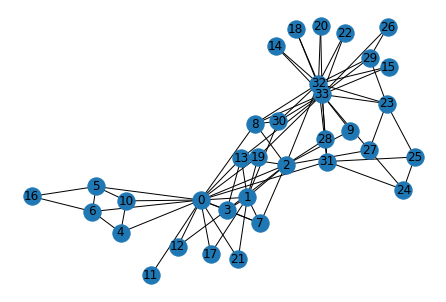

In [9]:
X = nx.karate_club_graph()
nx.draw(X, with_labels=True)
plt.show()

### Edge Betweenness Algo

Reference : [Girvan Newman by Anuradha Bhatia](https://www.youtube.com/watch?v=LtQoPEKKRYM)

In [10]:
#Calculate the shortest path between the nodes in the graph
def _single_source_shortest_path_basic(G, s):
    #initialize variables
    shortest_path = []
    predecessors = {}
    
    for v in G:
        predecessors[v] = []  
    sigma = dict.fromkeys(G, 0.0)
    sigma[s] = 1.0
    
    D = {}
    D[s] = 0
    
    queue = [s]
    
    # use BFS to find shortest paths
    while queue: 
        v = queue.pop(0)
        shortest_path.append(v)
        Dv = D[v]
        sigmav = sigma[v]
        for w in G[v]:
            if w not in D:
                queue.append(w)
                D[w] = Dv + 1
                
            if D[w] == Dv + 1:   # this is a shortest path, count paths
                sigma[w] += sigmav
                predecessors[w].append(v)  # predecessors
                
    return shortest_path, predecessors, sigma

def _accumulate_edges(betweenness, shortest_path, predecessors, sigma, s):
    
    delta = dict.fromkeys(shortest_path, 0)
    while shortest_path:
        w = shortest_path.pop()
        coeff = (1 + delta[w]) / sigma[w]
        for v in predecessors[w]:
            c = sigma[v] * coeff
            if (v, w) not in betweenness:
                betweenness[(w, v)] += c
            else:
                betweenness[(v, w)] += c
            delta[v] += c
        if w != s:
            betweenness[w] += delta[w]
            
    return betweenness

def edge_betweenness_centrality(G):  
    # b[v]=0 for v in G
    betweenness = dict.fromkeys(G, 0.0)  
    
    # b[e]=0 for e in G.edges()
    betweenness.update(dict.fromkeys(G.edges(), 0.0))
    
    for n in G:        
        # use BFS
        shortest_path, predecessors, sigma = _single_source_shortest_path_basic(G, n)
        # accumulation
        betweenness = _accumulate_edges(betweenness, shortest_path, predecessors, sigma, n)
        
    # rescaling
    for n in G:  # remove nodes to only return edges
        del betweenness[n]

    for e in betweenness:
        betweenness[e] *= 0.5
    
    return betweenness

#### We can now calcualte the betweenness for our smaller graph X. Here we will receive a list of betweenness values for each edge in the graph

In [11]:
betweenness = edge_betweenness_centrality(X)
betweenness

{(0, 1): 14.166666666666664,
 (0, 2): 43.638888888888886,
 (0, 3): 11.5,
 (0, 4): 29.333333333333332,
 (0, 5): 43.83333333333333,
 (0, 6): 43.833333333333336,
 (0, 7): 12.80238095238095,
 (0, 8): 41.64841269841271,
 (0, 10): 29.333333333333332,
 (0, 11): 33.0,
 (0, 12): 26.099999999999994,
 (0, 13): 23.77063492063493,
 (0, 17): 22.509523809523813,
 (0, 19): 25.770634920634926,
 (0, 21): 22.50952380952381,
 (0, 31): 71.39285714285712,
 (1, 2): 13.033333333333335,
 (1, 3): 4.333333333333333,
 (1, 7): 4.164285714285714,
 (1, 13): 6.9595238095238106,
 (1, 17): 10.490476190476187,
 (1, 19): 8.209523809523809,
 (1, 21): 10.490476190476187,
 (1, 30): 18.10952380952381,
 (2, 3): 12.583333333333332,
 (2, 7): 14.145238095238092,
 (2, 8): 5.147619047619047,
 (2, 9): 17.28095238095238,
 (2, 13): 4.28095238095238,
 (2, 27): 23.10873015873016,
 (2, 28): 12.780952380952376,
 (2, 32): 38.70158730158729,
 (3, 7): 1.8880952380952383,
 (3, 12): 6.899999999999997,
 (3, 13): 8.37142857142857,
 (4, 6): 2.66

#### The edge with the maximum betweeness is given by the call below and this will be the edge that should first be removed when we run the Girvan Newman algorithm

In [12]:
max(betweenness, key=betweenness.get)

(0, 31)

### Girvan Newman Algo (Top-down approach)

##### This method keeps removing edges with maximum betweenness from Graph until splits into two communities or the specified number c.

In [13]:
#parameters : G = the graph, k=number of iteration (by default it will compute until the end)
def girvan_newman(G, c = 2, k = -1, log = False):
    
    startIteration = k
    graph = G.copy()
    
    # no of components
    initial_number_components = nx.number_connected_components(graph)    
    
    # stop when we have more communities compare to when we started
    current_number_components = initial_number_components
    
    # with a precised number of iteration :
    ignoreK = k < 0
    iterationCount = 0
    while True:
        
        # Break if we are matching the number of maximum iterations
        # Ignore if the maximum of iterations requested was -1
        if not ignoreK and k <= 0:
            break;
        
        # As soon as we made one itereation then check that the number of components
        # is matching the number of components requested
        if iterationCount > 0 and current_number_components >= c:
            break;
            
        # edge betweenness for G
        bw = edge_betweenness_centrality(graph)   

        # find the edge with max centrality (n1, n2)
        central_edge = max(bw, key=bw.get)

        #remove the central edge
        graph.remove_edge(central_edge[0],central_edge[1])  

        # recalculate the no of components
        current_number_components = nx.number_connected_components(graph)

        # Iteration count
        iterationCount = iterationCount + 1;
        if log:
            #print results for this iteration
            print("------------------------------------------")
            print("Iteration {0}:".format(iterationCount))
            print("Number of components = {0}".format(current_number_components))
        
        #remove an iteration
        k = k - 1
    
    return graph

#### We can run the Girvan Newman algorithm on our small graph now and see the communities that are found

##### First iteration: we can see that the edge (0,31) has been removed since it had the max betweenness.

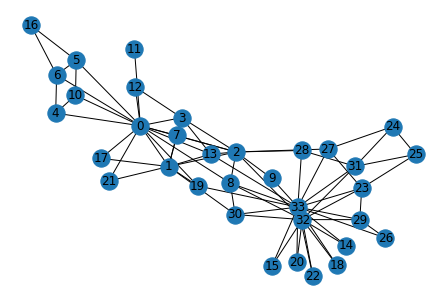

In [14]:
newGraph = girvan_newman(X, c=1, k=1)
nx.draw(newGraph, with_labels=True)
plt.show()

##### Second iteration: We show that (0,2) now has the max betweenness and has been removed when going throught the next iteration

In [15]:
betweenness = edge_betweenness_centrality(newGraph)
max(betweenness, key=betweenness.get)

(0, 2)

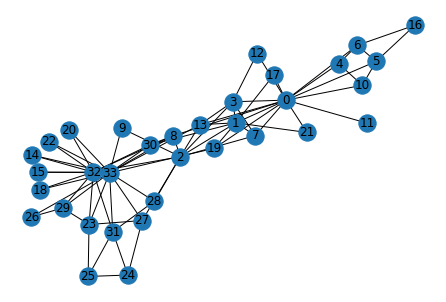

In [16]:
newGraph = girvan_newman(newGraph, c=1, k=1)

nx.draw(newGraph, with_labels=True)
plt.show()

##### We can now run without a max number of iterations to find our final communities

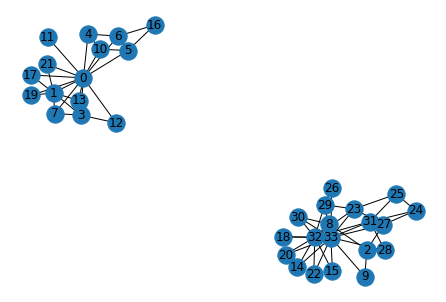

In [17]:
newGraph = girvan_newman(X, c=2)

nx.draw(newGraph, with_labels=True)
plt.show()

##### A visualisation of our components

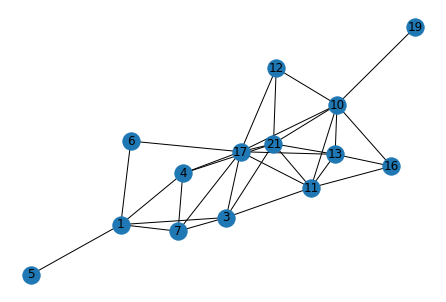

{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}


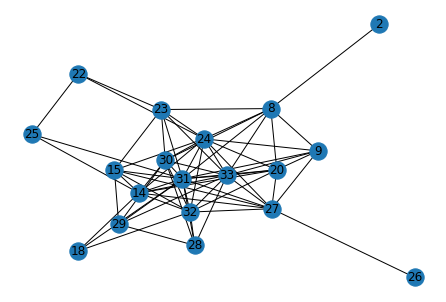

{2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


In [18]:
newGraphComps = nx.connected_components(newGraph)
for newGraphComp in newGraphComps:
    subGraph = fullG.subgraph(newGraphComp)
    nx.draw(subGraph, with_labels=True)
    plt.show()
    print(newGraphComp)

### Use built in Girvan Newman
##### We notice that the Networkx algorithm and ours return the same results.

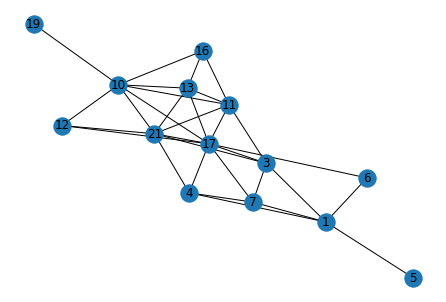

{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}


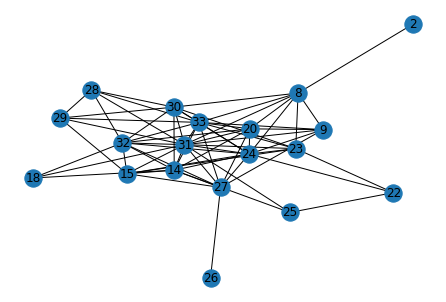

{2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


In [19]:
Y = nx.karate_club_graph()
comp = nx.algorithms.community.centrality.girvan_newman(Y)

m = 2
limited = itertools.takewhile(lambda c: len(c) <= m, comp)
for communities in limited:
    for community in communities:
        subGraph = fullG.subgraph(community)
        nx.draw(subGraph, with_labels=True)
        plt.show()
        print(community)

### Applied to the full graph

#### After having seen the effects on our small graph let's apply it to the entire network
Since there are 2.1M edges in the full blog graph that we have to analyze, it will take a while to compute the betweenness for each edge. 
The program will spend a lot of time in the algorithm that calculates the shortest path using BFS. Therefore, we skip this part.

In [20]:
# afterGirvanGraph = girvan_newman(fullG, c = 4)

# nx.draw(afterGirvanGraph, with_labels=True)
# plt.show()

### 2b) Implement the Degree centrality measure

The degree centrality of a node is simply its degree, which is the number of edges which are connected to it.

Let's take an example with the node 10 and calculte its degree :

In [21]:
nodetendegree = fullG.degree[10]
print("Node 10 has degree "+str(nodetendegree))
print("It is linked to the following nodes :"+str([n for n in fullG[10]]))

Node 10 has degree 11
It is linked to the following nodes :[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


However, the degree centrality of a node is usually normalized, so this is what we are going to do :

In [22]:
normalized_degree = nodetendegree / (len(fullG.nodes)-1)
print("Normalized degree of node 10 : "+str(normalized_degree))

Normalized degree of node 10 : 0.00012389759300767038


#### Now we will implement a function which computes the normalized degree centrality for every node and return it in a dictionnary:

In [23]:
def degree_centrality_measure(G):
    nodes = G.nodes
    number_of_nodes = len(nodes)
    max_possible_degree = (number_of_nodes-1)
    results = dict()
    for node in nodes:
        normalized_degree = G.degree[node] / max_possible_degree
        results[node] = normalized_degree
    return results

Let's see if it works by finding the node with the highest degree centrality :

In [24]:
degreeC = degree_centrality_measure(fullG)
maxDegreeCentralityNode = max(degreeC, key=degreeC.get)
maxDegreeCentralityValue = max(degreeC.values())
print("The node which has the highest degree centrality is the node "
      +str(maxDegreeCentralityNode)+" with a value of : "+str(maxDegreeCentralityValue))

The node which has the highest degree centrality is the node 32 with a value of : 0.10637171530585811


## 3) Analysis

### Identify the top k users with the highest Degree centrality in the graph. Experiment with different values of k and choose the most appropriate one.

Let's create a function which list the top k users with highest Degree centrality :

In [25]:
def k_nodes_max_degreeC(dictionary, k):
    k_nodes = heapq.nlargest(k, dictionary, key=dictionary.get)
    results = dict()
    for node in k_nodes:
        results[node] = dictionary[node]
    return results

Let's test it with different values of k

In [26]:
def print_k_top(degreeC, k_list):
    for k in k_list:
        i = 1
        print("Top "+str(k)+" :")
        print("-----------------")
        result_dict = k_nodes_max_degreeC(degreeC, k)
        for entry in result_dict:
            print("{0:3d}) Node: {1:5d}, Value: {2:.3f}".format(i, entry, result_dict[entry]))
            i = i+1
        print("----------------")

In [27]:
degreeC = degree_centrality_measure(fullG)
#print_k_top(degreeC, [5,10,20,50,100])

The top 7 is quite appropriate with a degree centrality higher or equal to 0.100

In [28]:
print_k_top(degreeC, [7])

Top 7 :
-----------------
  1) Node:    32, Value: 0.106
  2) Node:    94, Value: 0.106
  3) Node:    35, Value: 0.104
  4) Node:  1082, Value: 0.103
  5) Node:  1140, Value: 0.103
  6) Node:    33, Value: 0.102
  7) Node:  1355, Value: 0.101
----------------


### Evaluate different random walk strategies to spread a message across the network. The message should reach as many different communities as possible.

#### Fully random walk

In [29]:
#random walk trial 1 with a number of step as a stopping condition

#parameters --> G : the graph, steps: the number of steps of the walk
def fully_random_walk(G, steps):
    #Define a starting node
    randomStartNode = random.randint(0, len(G.nodes)-1)
    #List of visited nodes of the walk: here a node can appear more than one time as the walk is fully random
    walk = [randomStartNode]
    #Define the walk : at each step, we register the newly visited node and we go to another one
    currentNode = randomStartNode
    while steps > 0:
        #find the neighbors of the current node
        neighbors = [n for n in G.neighbors(currentNode)]
        #choose the next node from the neighbors
        nextNode = random.choice(neighbors)
        #register the next node in the walk
        walk.append(nextNode)
        #change current node
        currentNode = nextNode
        #remove one step
        steps = steps - 1
    return walk

In [30]:
fully_random_walk(fullG, 10)

[71141, 307, 70629, 307, 62626, 10265, 8625, 21376, 17099, 1757, 1443]

Let's see what kind of subgraph this walk can create :

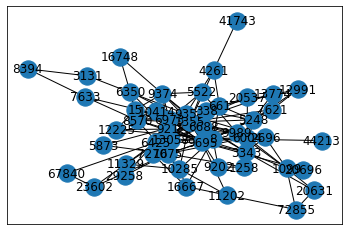

In [31]:
walk = fully_random_walk(fullG, 50)
subG = fullG.subgraph(walk)
nx.draw_networkx(subG)

#### No walk is allowed on a previously visited node

Now we create a condition such that the walk can't pass through a node that was already visited

In [32]:
#random walk trial 2 with a number of steps or having no neighbor available as stopping conditions

#parameters --> G : the graph, steps: the number of steps of the walk
def no_repetition_random_walk(G, steps):
    startingSteps = steps
    # Define a starting node
    randomStartNode = random.randint(0, len(G.nodes)-1)
    # List and set of visited nodes 
    # We use a set for a faster computation, but still keep a list as a set does not keep the order
    walk = [randomStartNode]
    walkSet = set()
    walkSet.add(randomStartNode)
    # Define the walk : at each step, we register the newly visited node and we go to another one
    currentNode = randomStartNode
    while steps > 0:
        # find the neighbors of the current node
        neighbors = [n for n in G.neighbors(currentNode)]
        # choose the next node from the neighbors
        nextNode = random.choice(neighbors)
        if nextNode not in walkSet:
            walk.append(nextNode)
            walkSet.add(nextNode)
            
        else:
            while (nextNode not in walkSet) != True:
                #remove the option of nextNode as it was already visited
                neighbors.remove(nextNode)
                #choose another neighbor
                if len(neighbors) > 0:
                    nextNode = random.choice(neighbors)
                else:
                    print("No unvisited neighbor at this point. Stop here.")
                    print("Number of steps : {0}".format(startingSteps - steps))
                    return walk
            walk.append(nextNode)
            walkSet.add(nextNode)
        #change current node
        currentNode = nextNode
        # remove one step
        steps = steps - 1
    return walk

##### Check if a given list contains any duplicates

In [33]:
def checkIfDuplicates(listOfElems):
    if len(listOfElems) == len(set(listOfElems)):
        return False
    else:
        return True

##### Test on full graph

In [34]:
walk = no_repetition_random_walk(fullG, 10000)
if checkIfDuplicates(walk) == False:
    print("There are no duplicates in this walk.")
else:
    print("There are duplicates in this walk.")

No unvisited neighbor at this point. Stop here.
Number of steps : 15
There are no duplicates in this walk.


Now let's see what kind of subgrah this walk can create :

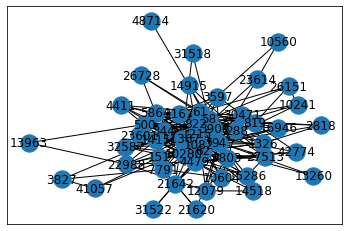

In [35]:
walk = no_repetition_random_walk(fullG, 50)
subG = fullG.subgraph(walk)
nx.draw_networkx(subG)

#### No walk allowed on a previously visited node, with tracing back allowed

The previous function stopped very early. We will therefore add the ability to come back at the previously visited node if no neighbor is available at the current node.

In [36]:
#random walk trial 3 with a number of steps or having no neighbor available as stopping conditions, traceback allowed

#parameters --> G : the graph, steps: the number of steps of the walk
def traceback_random_walk(G, steps):
    startingSteps = steps
    # Define a starting node
    randomStartNode = random.randint(0, len(G.nodes)-1)
    # List and set of visited nodes 
    # We use a set for a faster computation, but still keep a list as a set does not keep the order
    walk = [randomStartNode]
    walkSet = set()
    walkSet.add(randomStartNode)
    # Define the walk : at each step, we register the newly visited node and we go to another one
    currentNode = randomStartNode
    while steps > 0:
        comeBackStep = -1
        # find the neighbors of the current node
        neighbors = [n for n in G.neighbors(currentNode)]
        # choose the next node from the neighbors
        nextNode = random.choice(neighbors)
        if nextNode not in walkSet:
            walk.append(nextNode)
            walkSet.add(nextNode)
        else:
            while (nextNode not in walkSet) != True:
                #remove the option of nextNode as it was already visited
                neighbors.remove(nextNode)
                #choose another neighbor
                if len(neighbors) > 0:
                    nextNode = random.choice(neighbors)
                #if there is no neighbor available, we come back and try to find another path
                else:
                    if comeBackStep < -len(walk):
                        print("No more path possible.")
                        return walk
                    previousNode = walk[comeBackStep]
                    #find next node from previous node neighbors
                    neighbors = [n for n in G.neighbors(previousNode)]
                    nextNode = random.choice(neighbors)
                    comeBackStep = comeBackStep - 1
            walk.append(nextNode)
            walkSet.add(nextNode)
        #change currentNode
        currentNode = nextNode
        # remove one step
        steps = steps - 1
    return walk

Let's try to visit 20000 different nodes with that function (a step equal to a new node visited) :

In [37]:
walk = traceback_random_walk(fullG, 20000)
if checkIfDuplicates(walk) == False:
    print("There are no duplicates in this walk.")
else:
    print("There are duplicates in this walk.")
print("Number of nodes visited + the starting node : {0}".format(len(walk)))

There are no duplicates in this walk.
Number of nodes visited + the starting node : 20001


Now let's visualize the subgraph such a walk can create

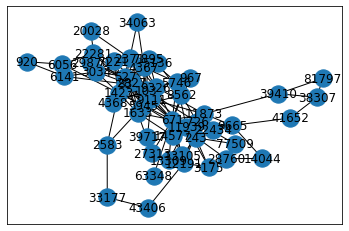

In [38]:
walk = traceback_random_walk(fullG, 50)
subG = fullG.subgraph(walk)
nx.draw_networkx(subG)

#### Random walk to find communities

There is an algorithm called Walktrap to identify communities with a random walk and merging with modularity which performs very well regarding the computing time (way better than girvan newman !) => O(n^2 log n)

Reference for walktrap : Pons, P., & Latapy, M. (2005, October). Computing communities in large networks using random walks. In International symposium on computer and information sciences (pp. 284-293). Springer, Berlin, Heidelberg.

Source code in python : https://igraph.org/python/doc/igraph-pysrc.html#Graph.community_walktrap

##### What if we use the degree centrality measure  here?

Let's implement another random walk strategy with the help of the previous ones, that will choose the next node with the highest degree within the neighbors of the current node :

In [39]:
#random walk trial 4 with a number of steps or having no neighbor available as stopping conditions, traceback allowed
# we choose the next node as the one which has the highest degree

#parameters --> G : the graph, steps: the number of steps of the walk
def degree_random_walk(G, steps):
    startingSteps = steps
    # Define a starting node
    randomStartNode = random.randint(0, len(G.nodes)-1)
    # List and set of visited nodes 
    # We use a set for a faster computation, but still keep a list as a set does not keep the order
    walk = [randomStartNode]
    walkSet = set()
    walkSet.add(randomStartNode)
    # Define the walk : at each step, we register the newly visited node and we go to another one
    currentNode = randomStartNode
    while steps > 0:
        comeBackStep = -1
        # find the neighbors of the current node
        neighbors = [n for n in G.neighbors(currentNode)]
        # choose the next node from the neighbors with highest degree
        degrees = dict()
        for node in neighbors:
            degrees[node] = G.degree[node]
        nextNode = max(degrees, key=degrees.get)
        if nextNode not in walkSet:
            walk.append(nextNode)
            walkSet.add(nextNode)
        else:
            while (nextNode not in walkSet) != True:
                #remove the option of nextNode as it was already visited
                neighbors.remove(nextNode)
                del degrees[nextNode]
                #choose another neighbor
                if len(neighbors) > 0:
                    nextNode = max(degrees, key=degrees.get)
                #if there is no neighbor available, we come back and try to find another path
                else:
                    if comeBackStep < -len(walk):
                        print("No more path possible.")
                        return walk
                    previousNode = walk[comeBackStep]
                    #find next node from previous node neighbors
                    neighbors = [n for n in G.neighbors(previousNode)]
                    degrees = dict()
                    for node in neighbors:
                        degrees[node] = G.degree[node]
                    nextNode = max(degrees, key=degrees.get)
                    comeBackStep = comeBackStep - 1
            walk.append(nextNode)
            walkSet.add(nextNode)
        #change currentNode
        currentNode = nextNode
        # remove one step
        steps = steps - 1
    return walk, randomStartNode

Let's test if it works on our full graph and show the resulting graph :

The starting node is : 69756


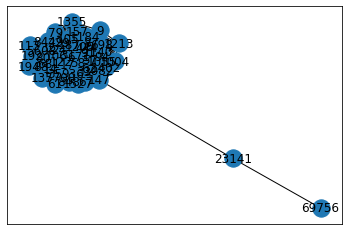

In [40]:
visitedNodes, startNode = degree_random_walk(fullG, 50)
subG = fullG.subgraph(visitedNodes)
nx.draw_networkx(subG)
print("The starting node is : {0}".format(startNode))

We can see that the starting node usually ends up creating a bouquet. So what if we allow the walk to start again at the starting node and begin a new walk from there without having the option to go through the previously visited nodes ? It would create multiple bouquet of nodes always going from the nodes with highest degree to lower ones.

We modify our code such that the starting node has enough neighbors to start again the number of times we want:

In [41]:
#random walk trial 5 with a number of steps or having no neighbor available as stopping conditions, traceback allowed
# we choose the next node as the one which has the highest degree and we make the walk start again after it finishes its steps

#parameters --> G : the graph, steps: the number of steps of the walk
def restart_degree_random_walk(G, steps, restart):
    startingSteps = steps
    # Define a starting node
    nodes = fullG.nodes
    maxDegree = max(fullG.degree[node] for node in nodes)
    if(restart > maxDegree):
        print("The parameter restart can't be higher than the maximal degree in the graph which is {0}".format(maxDegree))
        return
    randomStartNode = random.randint(0, len(G.nodes)-1)
    while G.degree(randomStartNode) < restart:
        randomStartNode = random.randint(0, len(G.nodes)-1)
    # List and set of visited nodes 
    # We use a set for a faster computation, but still keep a list as a set does not keep the order
    walk = [randomStartNode]
    walkSet = set()
    walkSet.add(randomStartNode)
    #create a dict to save the visited nodes of each walk separately
    partitionWalk = dict()
    partitionPos = -1
    # Define the walk : at each step, we register the newly visited node and we go to another one
    for start in range (0, restart):
        steps = startingSteps
        currentNode = randomStartNode
        while steps > 0:
            comeBackStep = -1
            # find the neighbors of the current node
            neighbors = [n for n in G.neighbors(currentNode)]
            # choose the next node from the neighbors with highest degree
            degrees = dict()
            for node in neighbors:
                degrees[node] = G.degree[node]
            nextNode = max(degrees, key=degrees.get)
            if nextNode not in walkSet:
                walk.append(nextNode)
                walkSet.add(nextNode)
            else:
                while (nextNode not in walkSet) != True:
                    #remove the option of nextNode as it was already visited
                    neighbors.remove(nextNode)
                    del degrees[nextNode]
                    #choose another neighbor
                    if len(neighbors) > 0:
                        nextNode = max(degrees, key=degrees.get)
                    #if there is no neighbor available, we come back and try to find another path
                    else:
                        if comeBackStep < -len(walk):
                            print("No more path possible.")
                            return walk
                        previousNode = walk[comeBackStep]
                        #find next node from previous node neighbors
                        neighbors = [n for n in G.neighbors(previousNode)]
                        degrees = dict()
                        for node in neighbors:
                            degrees[node] = G.degree[node]
                        nextNode = max(degrees, key=degrees.get)
                        comeBackStep = comeBackStep - 1
                walk.append(nextNode)
                walkSet.add(nextNode)
            #change currentNode
            currentNode = nextNode
            # remove one step
            steps = steps - 1
        lastIndexWalk = len(walk)-1
        partitionWalk[start] = walk[partitionPos+1:lastIndexWalk]
        partitionPos = lastIndexWalk
    return walk, randomStartNode

Let's see what we get as a subgraph :

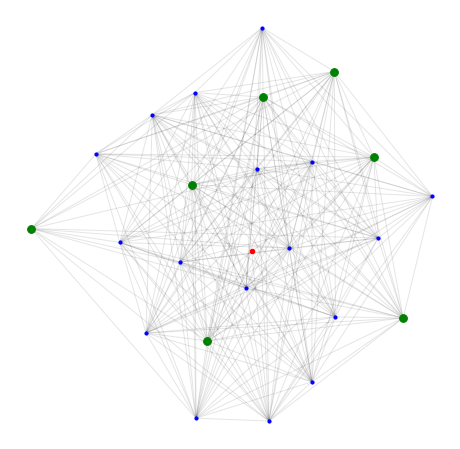

In [42]:
#run the walk
visitedNodes, startNode = restart_degree_random_walk(fullG, 8, 3)
subG = fullG.subgraph(visitedNodes)
#create the layout
pos = nx.spring_layout(subG, iterations=50, scale=2)
pos[startNode] = np.array([0,0])

plt.figure(figsize=(8, 8))
plt.axis('off')

nx.draw_networkx_nodes(subG, pos, node_size= 10, node_color='b')
nx.draw_networkx_nodes([startNode], pos, node_size=20, node_color='r')
#emphasize top 7 nodes with highest degree found previously
for node in [32,94,35,1082,1140,33,1355]:
    if node in visitedNodes:
        nx.draw_networkx_nodes([node], pos, node_size=60, node_color='g')
nx.draw_networkx_edges(subG, pos, alpha=0.1)

plt.show()

We can see that the first nodes to appear in this subgraph are the top ones (in green here) that we found earlier during the degree centrality analysis. So after around one or two hops we get to these nodes. The others nodes are then those one level under in the degree-hierachy. Therefore, this random walk is a good way to generate a subgraph of the original graph without the outliers.

### Identify users’ communities in the blog network using Girvan-Newman. Evaluate with different values of the iteration level.

##### Apply it to the Karate Graph (X) 
We should obtain two communities, as we saw in the visualisation

In [43]:
afterGirvanNewmanGraph = girvan_newman(X, c=2, k=12, log=True)

------------------------------------------
Iteration 1:
Number of components = 1
------------------------------------------
Iteration 2:
Number of components = 1
------------------------------------------
Iteration 3:
Number of components = 1
------------------------------------------
Iteration 4:
Number of components = 1
------------------------------------------
Iteration 5:
Number of components = 1
------------------------------------------
Iteration 6:
Number of components = 1
------------------------------------------
Iteration 7:
Number of components = 1
------------------------------------------
Iteration 8:
Number of components = 1
------------------------------------------
Iteration 9:
Number of components = 1
------------------------------------------
Iteration 10:
Number of components = 1
------------------------------------------
Iteration 11:
Number of components = 2


##### Apply it to Blog Network subgraph
Since our full graph takes a lot of time to run we can use the random walk algorithm to create subgraphs and analyse the communities

In [44]:
def one_degree_neighbor(neighbors, G):
    results = []
    for node in neighbors:
        if G.degree[node] == 1:
            results.append(node)
    return results

In [45]:
visitedNodes, startNode = restart_degree_random_walk(fullG, 5, 2)
final_nodes = visitedNodes
for node in visitedNodes:
        list_nodes = one_degree_neighbor([n for n in fullG[node]], fullG)
        final_nodes = final_nodes + list_nodes
subGraphG = fullG.subgraph(final_nodes)

##### Let's test different iterations and number of desired communities

In [46]:
afterGirvanNewmanGraph = girvan_newman(subGraphG, c=4, log=True)

------------------------------------------
Iteration 1:
Number of components = 1
------------------------------------------
Iteration 2:
Number of components = 1
------------------------------------------
Iteration 3:
Number of components = 1
------------------------------------------
Iteration 4:
Number of components = 1
------------------------------------------
Iteration 5:
Number of components = 2
------------------------------------------
Iteration 6:
Number of components = 2
------------------------------------------
Iteration 7:
Number of components = 2
------------------------------------------
Iteration 8:
Number of components = 2
------------------------------------------
Iteration 9:
Number of components = 2
------------------------------------------
Iteration 10:
Number of components = 2
------------------------------------------
Iteration 11:
Number of components = 2
------------------------------------------
Iteration 12:
Number of components = 2
-------------------------

In [47]:
afterGirvanNewmanGraph = girvan_newman(subGraphG, c=7, log=True)

------------------------------------------
Iteration 1:
Number of components = 1
------------------------------------------
Iteration 2:
Number of components = 1
------------------------------------------
Iteration 3:
Number of components = 1
------------------------------------------
Iteration 4:
Number of components = 1
------------------------------------------
Iteration 5:
Number of components = 2
------------------------------------------
Iteration 6:
Number of components = 2
------------------------------------------
Iteration 7:
Number of components = 2
------------------------------------------
Iteration 8:
Number of components = 2
------------------------------------------
Iteration 9:
Number of components = 2
------------------------------------------
Iteration 10:
Number of components = 2
------------------------------------------
Iteration 11:
Number of components = 2
------------------------------------------
Iteration 12:
Number of components = 2
-------------------------

In [48]:
afterGirvanNewmanGraph = girvan_newman(subGraphG, c=9, log=True)

------------------------------------------
Iteration 1:
Number of components = 1
------------------------------------------
Iteration 2:
Number of components = 1
------------------------------------------
Iteration 3:
Number of components = 1
------------------------------------------
Iteration 4:
Number of components = 1
------------------------------------------
Iteration 5:
Number of components = 2
------------------------------------------
Iteration 6:
Number of components = 2
------------------------------------------
Iteration 7:
Number of components = 2
------------------------------------------
Iteration 8:
Number of components = 2
------------------------------------------
Iteration 9:
Number of components = 2
------------------------------------------
Iteration 10:
Number of components = 2
------------------------------------------
Iteration 11:
Number of components = 2
------------------------------------------
Iteration 12:
Number of components = 2
-------------------------

In [49]:
afterGirvanNewmanGraph = girvan_newman(subGraphG, c=10, log=True)

------------------------------------------
Iteration 1:
Number of components = 1
------------------------------------------
Iteration 2:
Number of components = 1
------------------------------------------
Iteration 3:
Number of components = 1
------------------------------------------
Iteration 4:
Number of components = 1
------------------------------------------
Iteration 5:
Number of components = 2
------------------------------------------
Iteration 6:
Number of components = 2
------------------------------------------
Iteration 7:
Number of components = 2
------------------------------------------
Iteration 8:
Number of components = 2
------------------------------------------
Iteration 9:
Number of components = 2
------------------------------------------
Iteration 10:
Number of components = 2
------------------------------------------
Iteration 11:
Number of components = 2
------------------------------------------
Iteration 12:
Number of components = 2
-------------------------

We see that communities 8, 9 and 10 are connected with few edges since it only takes one to two iterations to create them. Thus, we can assume that we have an optimal number of communities with 9. After 9 communities we will begin to create smaller communities and even singletons.

# 4) Visualization

### 4a) Visualize the output of Girvan-Newman by coloring the nodes according to their assigned communities.

#### On the karate club graph

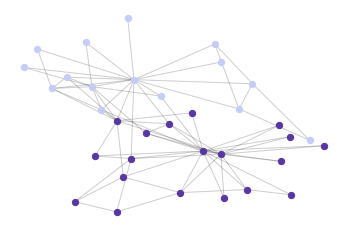

In [50]:
resulting_G = girvan_newman(X, c=2)
communities = nx.connected_components(resulting_G)
pos = nx.fruchterman_reingold_layout(X)  # compute graph layout

for community in communities:
    rgb = (random.random(), random.random(), random.random())
    nx.draw_networkx_nodes(X, pos, node_size=40,nodelist=list(community), node_color=[rgb], cmap=plt.get_cmap('Paired'))
    nx.draw_networkx_edges(X, pos, alpha=0.1)

plt.axis('off')
plt.show()

#### Visualise the subgraph of the network
This is the same subgraph we used for analysis
We can determine that, for this subgraph, 9 communities are optimal since the colors are seperated into their clusters with little to no mixing.

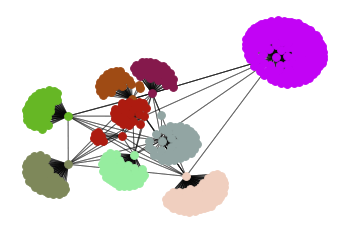

In [55]:
resulting_G = girvan_newman(subGraphG, c = 9)
communities = nx.connected_components(resulting_G)
pos = nx.fruchterman_reingold_layout(subGraphG)  # compute graph layout

for community in communities:
    rgb = (random.random(), random.random(), random.random())
    nx.draw_networkx_nodes(subGraphG, pos, node_size=60,nodelist=list(community), node_color=[rgb], cmap=plt.get_cmap('Paired'))
    nx.draw_networkx_edges(subGraphG, pos, alpha=0.1)

plt.axis('off')
plt.show()

### 4b) Visualize the top k users with highest Degree centrality and their 1 degree neighbors.

In [56]:
def visualize_k_top(degreeC, k, G):
    #configurate plot
    fig=plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111) # the big subplot
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    rows = k
    #choose what to plot
    result_dict = k_nodes_max_degreeC(degreeC, k)
    i = 1
    print("Top "+str(k)+" :")
    print("-----------------")
    for node in result_dict:
        list_nodes = one_degree_neighbor([n for n in G[node]], G)
        list_nodes.append(node)
        subG = G.subgraph(list_nodes)
        subplot = fig.add_subplot(rows, 1, i)
        subplot.set_title(i)
        img = nx.draw_networkx(subG)
        i += 1
    plt.show

Top 7 :
-----------------


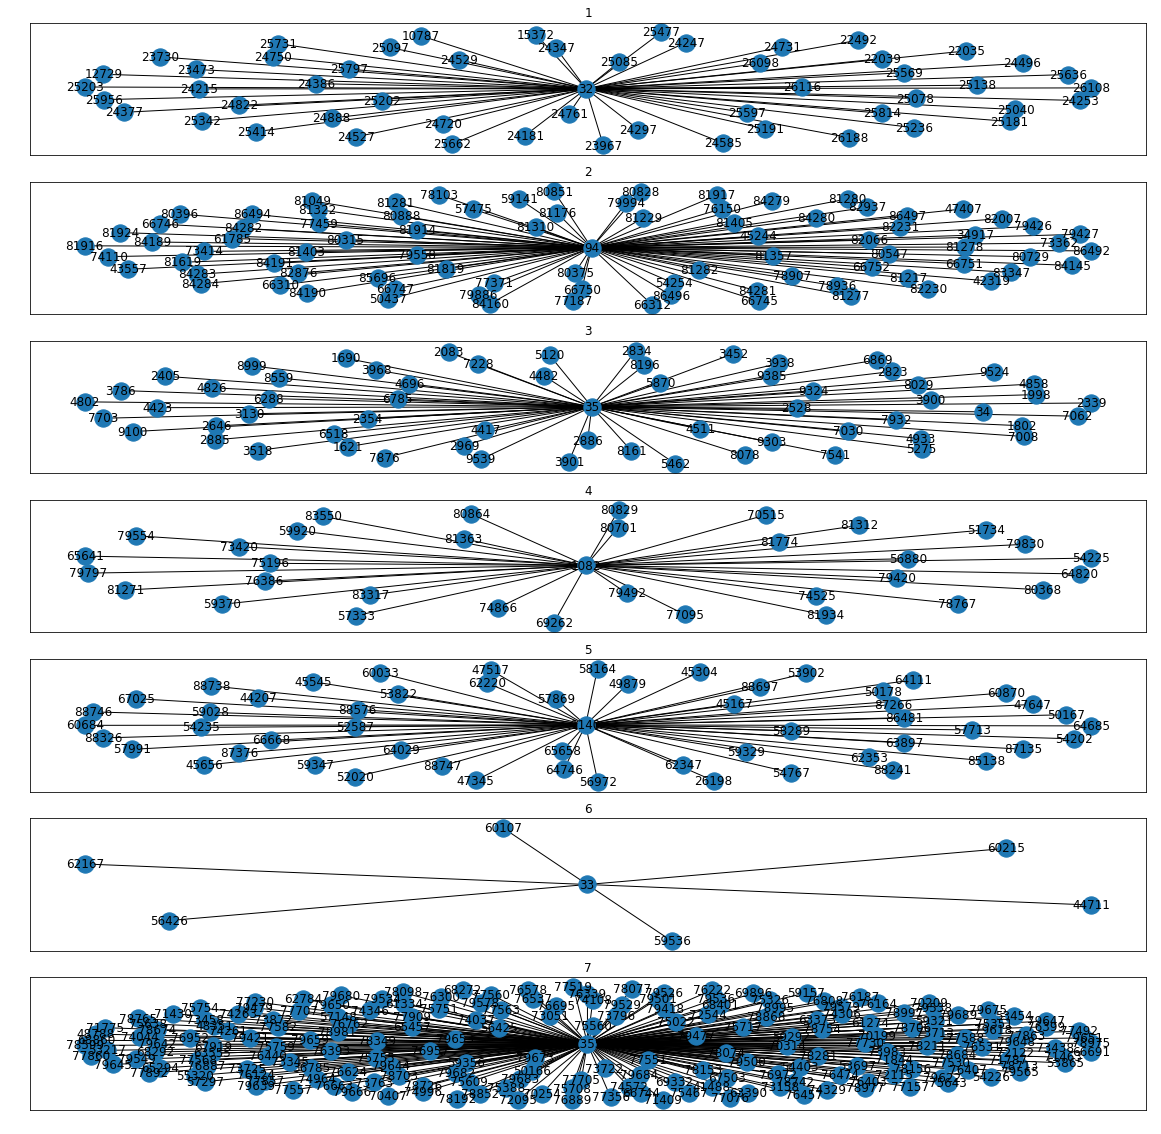

In [57]:
visualize_k_top(degree_centrality_measure(fullG), 7, fullG)